In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '9')

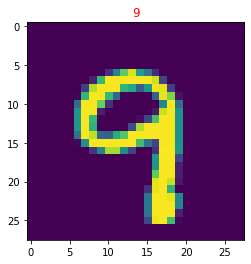

In [20]:
import matplotlib.pyplot as plt
import random
import numpy as np

randInt = random.choice(np.arange(60001))
class_names = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.imshow(train_data[randInt])
plt.title(class_names[train_labels[randInt]], color='red')

In [22]:
train_data[0].shape

(28, 28)

In [36]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (10**(epoch/10)))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=.006),
              metrics=["accuracy"])

history = model.fit(train_data, train_labels, epochs = 15)


Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6240 - accuracy: 0.5054
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7894 - accuracy: 0.7573
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6465 - accuracy: 0.8352
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6206 - accuracy: 0.8492
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6074 - accuracy: 0.8531
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5981 - accuracy: 0.8578
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5994 - accuracy: 0.8620
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6171 - accuracy: 0.8564
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6022 - accuracy: 0.8619
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.593

In [40]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [37]:
y_probs = model.predict(test_data)



313/313 [==============================] - 1s 1ms/step


In [38]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

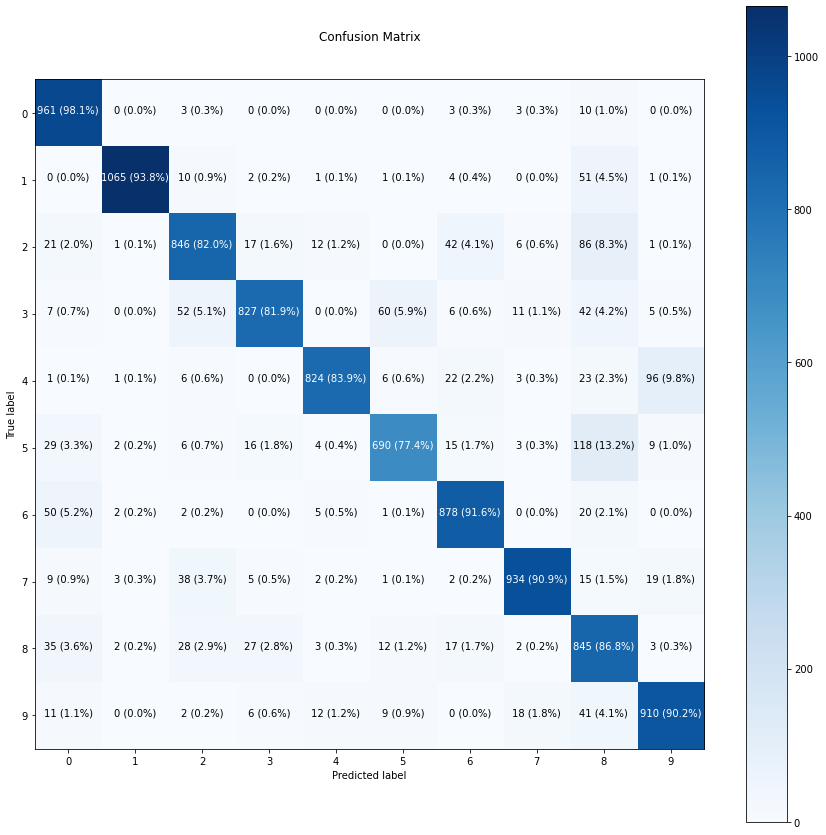

In [41]:
from sklearn.metrics import confusion_matrix

make_confusion_matrix(test_labels, y_preds, classes=class_names, figsize=(15,15), text_size=10)